# Exercise 5.20: A more advanced adaptive method for the trapezoidal rule:

In section 5.3 we studied an adaptive version of the trapezoidal rule in which the number of steps is increased -- and the width $h$ of the slices correspondingly decreased -- until the calculation givea a value for the integral accuracte to some desired level. Although this method varies $h$, it still calculates the integral at any individual stage of the process using slices of equal width through the domain of integration. In this exercise we look at a more sophisticatedform of the trapezoidal rule that uses different step sizes in different parts of the domain, which can be useful particularly for poorly behaved functions that vary rapidly in certain regions but not others. Remarkably, this method is not much more complicated to program that the ones we've already seen, if one know ths right tricks. 

Here's how the method works:

Suppose we wish to evaluate the integral $I=\int^b_a f(x)dx$ and we want an error of no more than $\epsilon$ on our answer. To put that another way, if we divide up the integral into slices of width $h$ then we require an accuracy per slice of 

$$ h\frac{\epsilon}{b-a} = h \delta$$


where $\delta = \epsilon/(b-a$ is the target accuracy per unit interval. 

We start by evaluating the integral using the ptrapezoidal rule with just a single slice of width $h_1 = b-a$. Let us call the estimate of the integral from this calculation $I_1$. usually $I_1$ will not be very accurate, but that doesn't matter. Next we make a second estimate $I_2$ of the integral, again using the trapezoidal rule but now with two slices of width $h_2 = \frac{1}{2}h_1$ each. Equation (5.28) tells us that the error on this second estimate is $\frac{1}{3}(I_2-I_1)$ to leading order. If the absolute value of this error is smaller than the required accuracy $\epsilon$ then our calculation is complete and we need to go no further. $I_2$ is a good enough estimate of the integral.

Most likely, however, this will not be the case; the accuracy will not be good enough. If so, then we divide the integration interval into two equal parts of size $\frac{1}{2}(b-a)$ each, and we repat theprocess above in each part seperately, calculating estimates $i_1$ and $I_2$ using one and two slices respectively, estimating the rror, and checking to see if it is less thatn the required accuracy, which is now $\frac{1}{2}(b-a)\delta = \frac{1}{2}\epsilon$.

We keep on repeating this process, dividing each slice in half and in half again, as many times as necessary to achieve the desired accuracy in every slice. Different slices may be divided different numbers of times, and hence we may end up with a different sized slices indifferent parts of the itnegation domain, The method automatically uses whatever size and number of slices is appropriate in each region.

a) Write a progam using this method to calculate hte integral

$$ I = \int^{10}_0 \frac{sin^2x}{x^2}\text{d}x,$$

to an accuracy of $\epsilon = 10^{-4}$. Start by writing a function to calculate the integrand $f(x) = (sin^2x)/x^2$. Note that the limiting value of the integrand at $x=0$ is 1. You'll probably have to include this point as a special case in your function using an if statement.

The best way to perform the integration itself is to make use of the technique of recursion, the ability of a Python function to call tiself. Write a function step(x1, x2, f1,f2) that takes as arugments the beginning and end points $x_1, x_2$ of a slice and the values $f(x_1), f(x_2)$ of the integrand at those two points, and returns the value of the integral from $x_1$ to $x_2$. Thsi function should evaluate the two estimates $I_1$ and $I_2$ of the integral from $x_1$ to $x_2$, calculated with on and two slices respectively, and the error $\frac{1}{3}(I_2 - I_1)$. If this error meets the target value, which is $(x_2-x_1)\delta$, then the calculation is complete and the function simply returns the value $I_2$. If the error fails to meet the target, then the function calls itself, twice, to evaluate the integral seperately on the first and second halves of the interval and returns the sum of the two results. (And then those functions can call themselves, and so forth, subdividing the integral as many times as necessary to reach the required accuracy.)



In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def f(x):
    if x==0:
        return 1
    return np.sin(x)**2/x**2

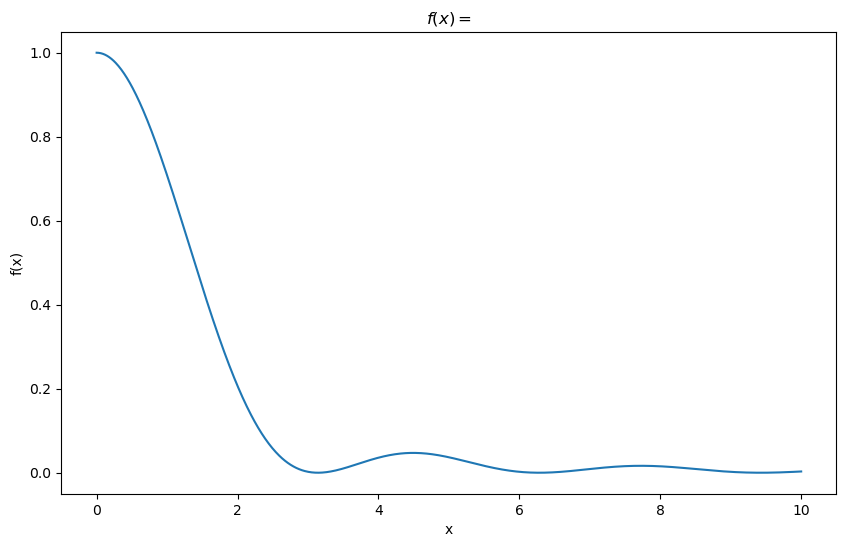

In [7]:
x_range = np.linspace(0, 10, 1000)
y = [f(x) for x in x_range]
plt.figure(figsize=(10,6))
plt.title("$f(x)=\frac{sin^2x}{x^2}$")
plt.plot(x_range, y)
plt.xlabel("x")
plt.ylabel("f(x)")
plt.show()